In [66]:
pwd

'C:\\Users\\David R\\downloads'

## A Whale off the Port(folio)

In [68]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

### Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

    *whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

    *algo_returns.csv: Contains returns from the in-house trading algorithms from Harold's company.

    *sp500_history.csv: Contains historical closing prices of the S&P 500 Index
    
### Whale Returns
Read the Whale Portfolio daily returns and clean data

In [69]:
# Reading whale returns
whale_returns_csv =("whale_returns.csv") 
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [70]:
#nulls 
whale_returns_df.isnull().mean() * 100
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [71]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Algorithmic Daily Returns

Read the algorithmic daily returns/clean data


In [72]:
#Reading Algo Returns 
algo_returns_csv = Path("algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [73]:
#count nulls
algo_returns_df.isnull().mean() *100
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [74]:
#drop nulls
algo_returns_df = algo_returns_df.dropna()

### S&P 500 Returns

Read S&P Historic Closing Prices and create new daily returns


In [75]:
#Reading S&P Data
sp500_history_csv = Path("sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [76]:
#Check Data
sp500_history_df.dtypes

Close    object
dtype: object

In [77]:
#Fix Data
sp500_history_df["Close"]= sp500_history_df["Close"].str.replace('$','').astype("float")
sp500_history_df.sort_index(inplace = True)
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [78]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history_df.pct_change()

In [79]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [80]:
#Rename Column
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)

### Combine Whale, Algorithmic, and S&P 500 Returns

In [81]:
#Concatenate
combined_df = pd.concat([whale_returns_df, algo_returns_df,sp500_daily_returns], axis = "columns",join = "inner")

### Portfolio Analysis

Calculate/Visualize performance & risk metrics

#### Performance

Calculate/Plot Daily & Cumulative Returns

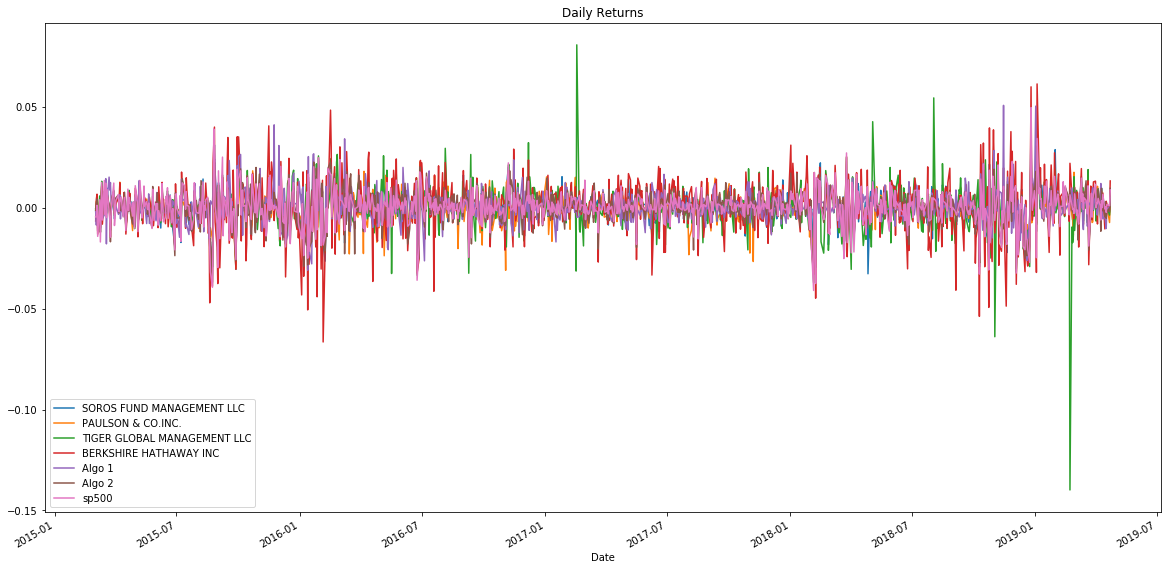

In [82]:
#Daily Returns
combined_df.plot( title="Daily Returns" , figsize=(20,10))

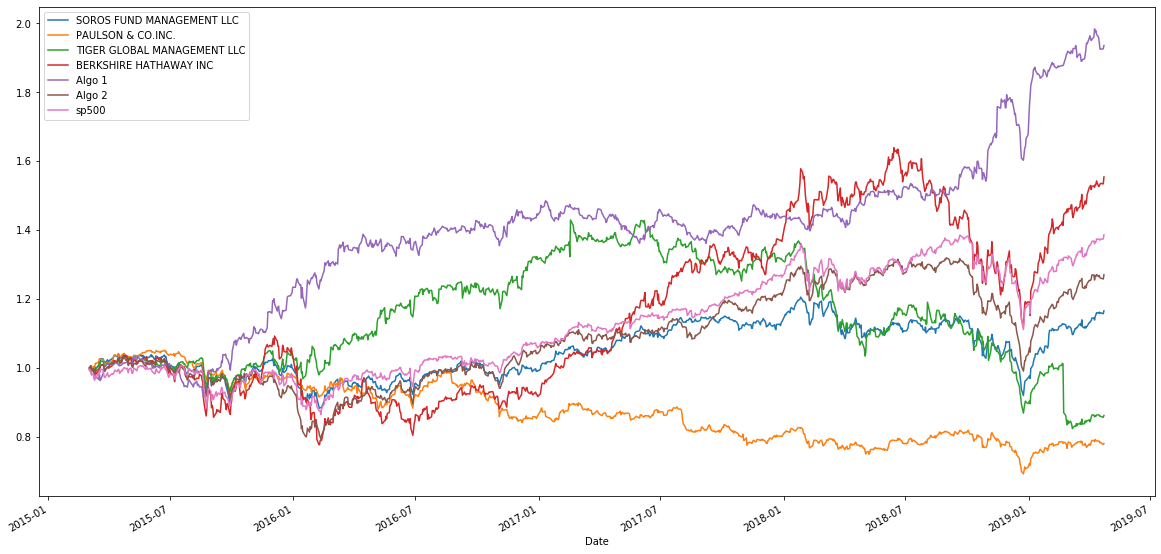

In [83]:
#Cumulative Returns
combined_df_cumulative_returns = (1 + combined_df).cumprod()
combined_df_cumulative_returns.head()
combined_df_cumulative_returns.plot(figsize=(20,10))

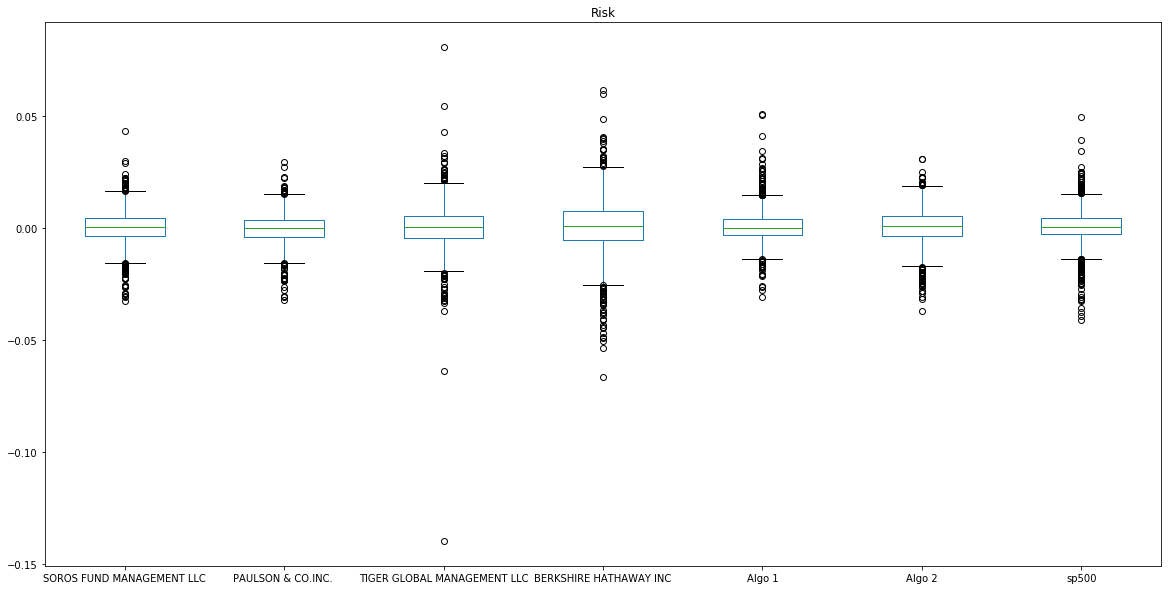

In [84]:
#Box Plot
combined_df.plot.box(title= "Risk", figsize=(20,10))

In [85]:
#Standard Deviations. 
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
df_daily_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
df_daily_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [86]:
#Determine which porfolios are risker than S&P 500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [87]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


### Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1.Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window 
2.Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500 
3.Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500


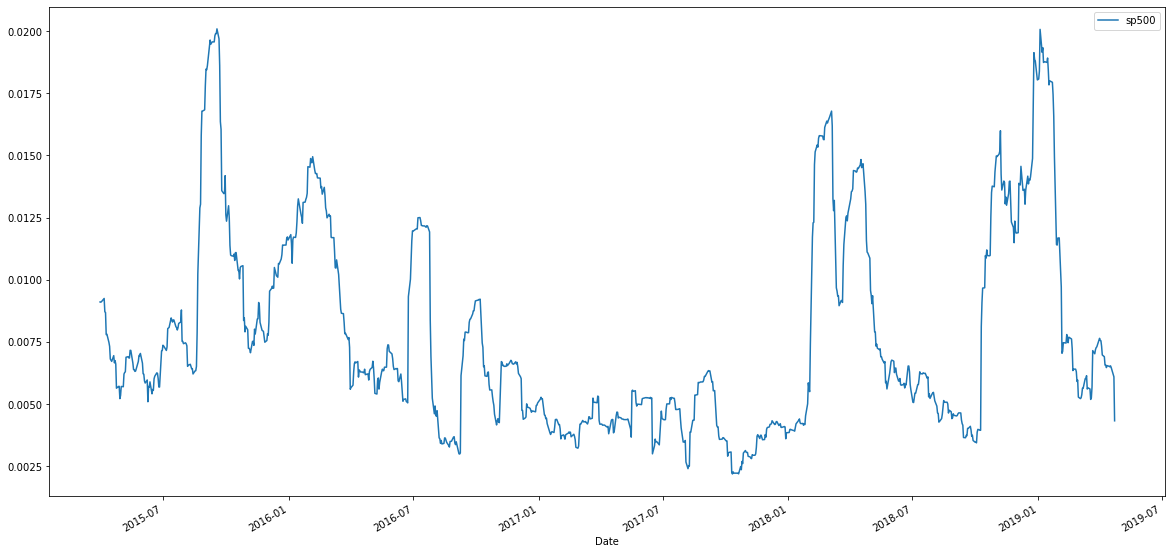

In [88]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_rolling_21 = combined_df[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))

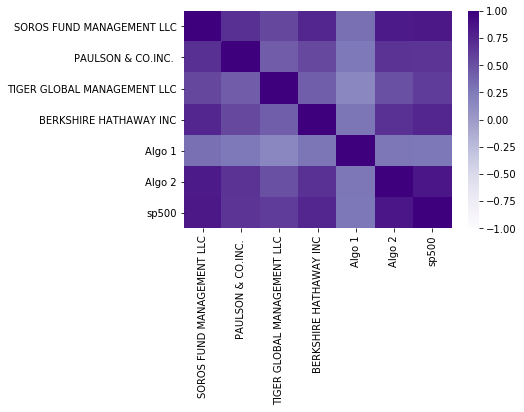

In [93]:
# Correlation
correlation_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

# Display Correlation matrix
import seaborn as sns <--left it here.
sns.heatmap(combined_df.corr(), vmin=-1, vmax=1,cmap="Purples")

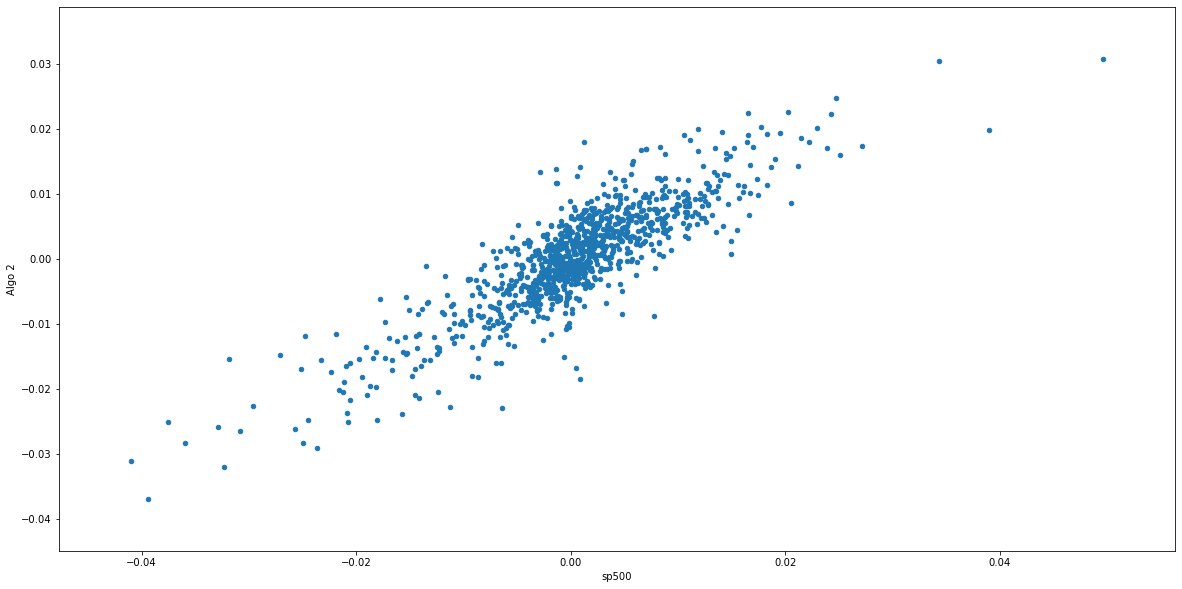

In [94]:
combined_df.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))

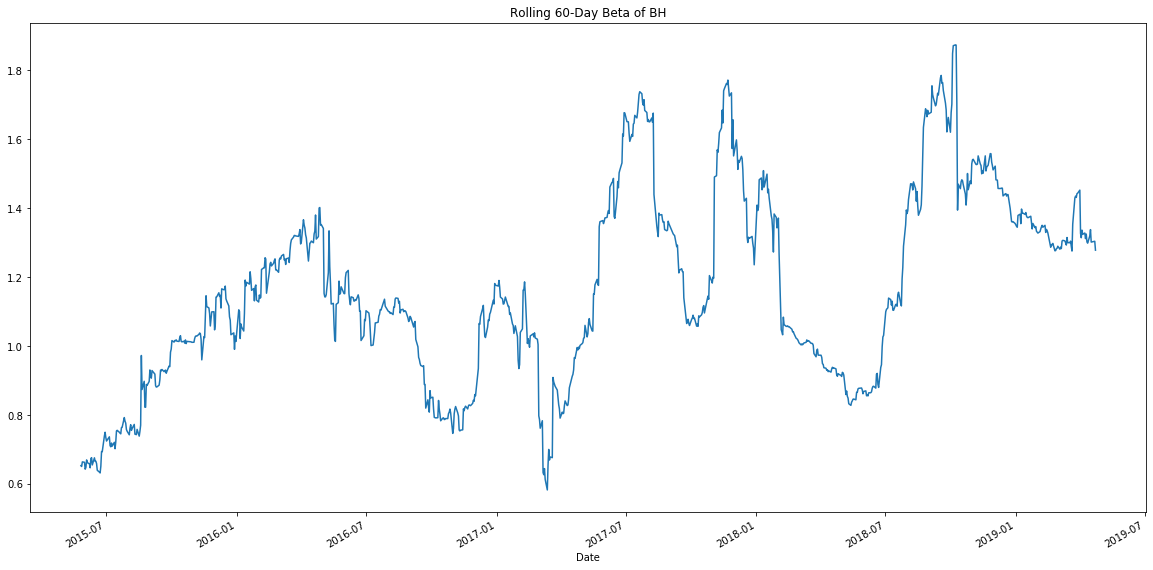

In [95]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['sp500'])
rolling_variance = combined_df['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

### Challenge: Exponentially Weighted Average

An Alternate way to calculate a rolling window to take the exponentially weighted moving average.


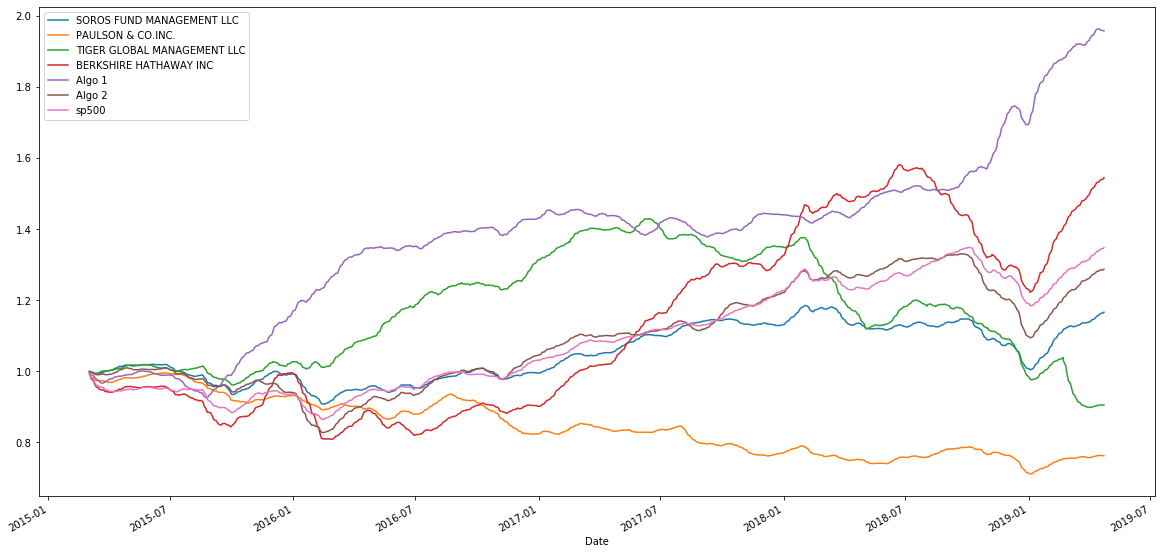

In [96]:
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+combined_df_ewm).cumprod().plot(figsize = (20,10))

#### Algo one has the highest return


### Sharpe Ratios

In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance


In [97]:
# Annualzied Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

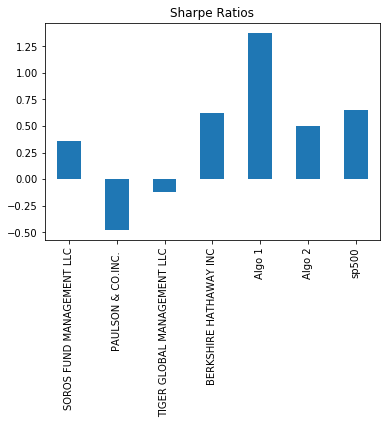

In [98]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

#### Algo 1 did the best and Algo 2 did okay, but not great. 

### Custom Portfolio

3 Meme stocks have been chosen. Though the Data is old so AMC/GME hadn't hit meme status yet. 

In [142]:
# Read the first stock
AMC_History = pd.read_csv(Path("AMC2019C.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
AMC_History.rename(columns = {"Close/Last":"AMC"}, inplace = True)
AMC_History.head()

,AMC
Date,
2018-05-02,16.50
2018-05-03,16.55
2018-05-04,16.30
2018-05-07,17.20
2018-05-08,16.80


In [143]:
#AMD
AMD_history = pd.read_csv(Path("AMD2019C.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
AMD_history.rename(columns = {"Close":"AMD"}, inplace = True)
AMD_history.head()

,AMD
Date,
2018-05-02,10.97
2018-05-03,10.93
2018-05-04,11.28
2018-05-07,11.59
2018-05-08,11.61


In [144]:
#GME
GME_history = pd.read_csv(Path("GME2019C.csv"), index_col="Date", 
                           parse_dates = True, infer_datetime_format= True)
GME_history.rename(columns = {"Close":"GME"}, inplace = True)
GME_history.head()

,GME
Date,
2018-05-02,13.45
2018-05-03,12.83
2018-05-04,13.00
2018-05-07,12.89
2018-05-08,12.79


In [145]:
meme_stocks = pd.concat((AMC_History, AMD_history, GME_history), axis = 1, join= "inner")
meme_stocks.sort_index(ascending = True, inplace = True)
# print some
meme_stocks.head()

,AMC,AMD,GME
Date,,,
2018-05-02,16.50,10.97,13.45
2018-05-03,16.55,10.93,12.83
2018-05-04,16.30,11.28,13.00
2018-05-07,17.20,11.59,12.89
2018-05-08,16.80,11.61,12.79


In [146]:
#Reset
meme_stocks.index = meme_stocks.index.normalize()

In [149]:
# Calculate daily returns
meme_daily_returns = meme_stocks.pct_change()
# Drop NAs
meme_daily_returns.dropna(inplace=True)
# Display sample data
meme_daily_returns.head()

,AMC,AMD,GME
Date,,,
2018-05-03,0.003030,-0.003646,-0.046097
2018-05-04,-0.015106,0.032022,0.013250
2018-05-07,0.055215,0.027482,-0.008462
2018-05-08,-0.023256,0.001726,-0.007758
2018-05-09,-0.044643,0.029285,0.010946


#### Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [150]:
# Set weights
weights = [1/3, 1/3, 1/3]
my_portfolio = meme_stocks.dot(weights)
# Calculate portfolio return
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)
# Display sample data
my_portfolio_returns.head()

Date
2018-05-03   -0.014907
2018-05-04    0.006698
2018-05-07    0.027107
2018-05-08   -0.011516
2018-05-09   -0.006553
dtype: float64

In [139]:
my_portfolio.dtypes

dtype('float64')

In [163]:
my_portfolio

Date
2018-05-02    13.640000
2018-05-03    13.436667
2018-05-04    13.526667
2018-05-07    13.893333
2018-05-08    13.733333
                ...    
2019-04-25    17.303333
2019-04-26    17.390000
2019-04-29    17.316667
2019-04-30    17.146667
2019-05-01    16.676667
Length: 251, dtype: float64

In [128]:
meme_stocks.dtypes
#Had trouble with the data types earlier

AMC    float64
AMD    float64
GME    float64
dtype: object

 ### Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [151]:
portfolio_returns = pd.concat((my_portfolio_returns,combined_df), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"Meme_Portfolio"}, inplace = True)
portfolio_returns

,Meme_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-05-03,-0.014907,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254
2018-05-04,0.006698,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811
2018-05-07,0.027107,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458
2018-05-08,-0.011516,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266
2018-05-09,-0.006553,-0.001844,0.007309,-0.001341,0.002438,-0.001571,0.007850,0.009682
...,...,...,...,...,...,...,...,...
2019-04-16,0.015729,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.010821,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.009808,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


In [152]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,Meme_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,,
2018-05-03,-0.014907,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254
2018-05-04,0.006698,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811
2018-05-07,0.027107,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458
2018-05-08,-0.011516,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266
2018-05-09,-0.006553,-0.001844,0.007309,-0.001341,0.002438,-0.001571,0.007850,0.009682
...,...,...,...,...,...,...,...,...
2019-04-16,0.015729,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.010821,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,-0.009808,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


###  Re-run the risk analysis with your portfolio to see how it compares to the others
 Calculate the Annualized Standard Deviation

In [153]:
# Risk
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
Meme_Portfolio,0.026392
SOROS FUND MANAGEMENT LLC,0.009196
PAULSON & CO.INC.,0.007373
TIGER GLOBAL MANAGEMENT LLC,0.014749
BERKSHIRE HATHAWAY INC,0.015369
Algo 1,0.008334
Algo 2,0.008700
sp500,0.009513


In [154]:
higher_std = portfolio_std[portfolio_std["std"] > portfolio_std.loc["sp500", "std"]]
higher_std

,std
Meme_Portfolio,0.026392
TIGER GLOBAL MANAGEMENT LLC,0.014749
BERKSHIRE HATHAWAY INC,0.015369


### Meme Portfolio risks it for the biscuit

### Calculate and plot rolling std with 21-day window

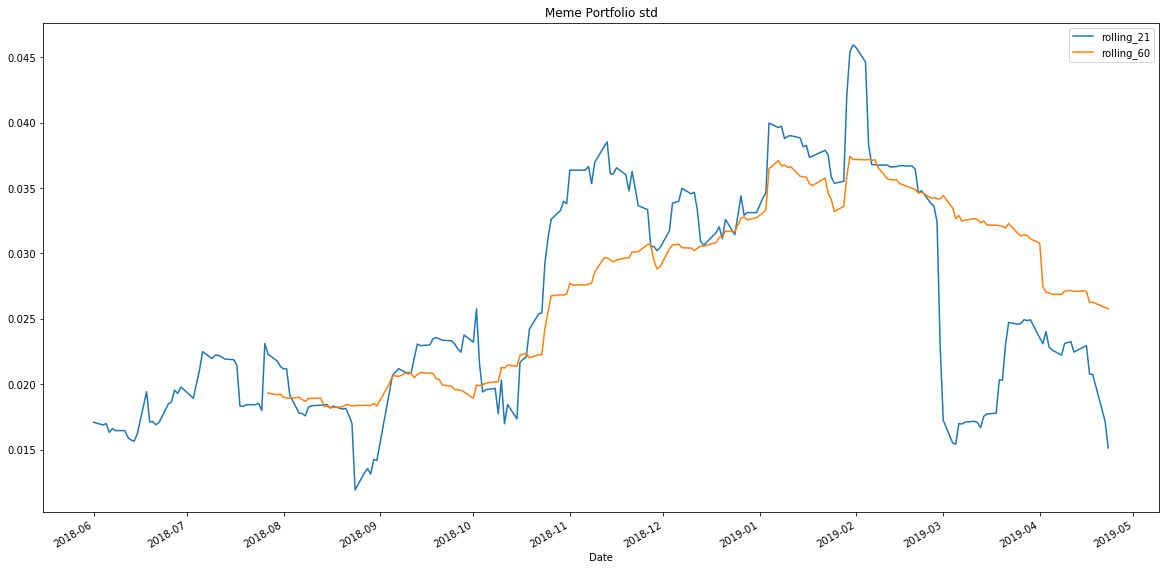

In [168]:
# Calculate rolling standard deviation
my_portfolio_rolling_21 = portfolio_returns[["Meme_Portfolio"]].rolling(window = 21).std()
my_portfolio_rolling_60 = portfolio_returns[["Meme_Portfolio"]].rolling(window = 60).std()
# Plot rolling standard deviation
ax = my_portfolio_rolling_21.plot(figsize = (20,10), title = 'Meme Portfolio std')
my_portfolio_rolling_60.plot(ax = ax)
ax.legend(['rolling_21','rolling_60'])

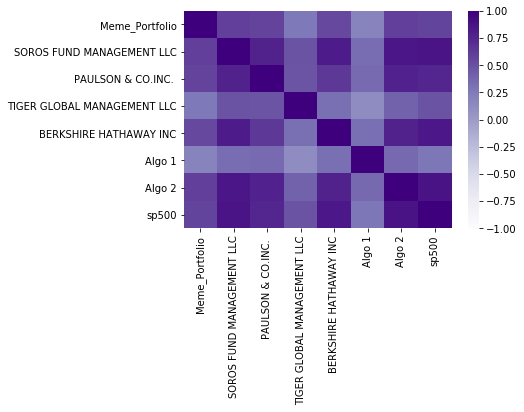

In [158]:
# Calculate and plot the correlation
correlation = portfolio_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="Purples")

### Calculate and plot rolling 60-day Beta for Your Portfolio compared to S&P 


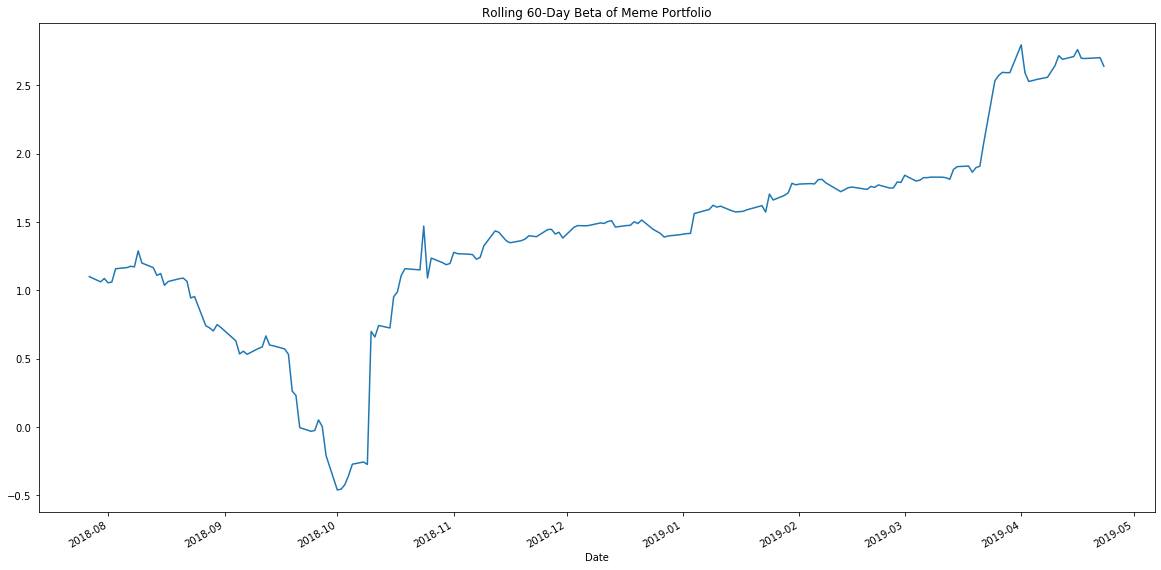

In [173]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['Meme_Portfolio'].rolling(window=60).cov(portfolio_returns['sp500'])
rolling_variance = portfolio_returns['sp500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Meme Portfolio')

### Using daily returns, calculate and visualise the Sharpe Ratios using bar plot

In [169]:
# Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

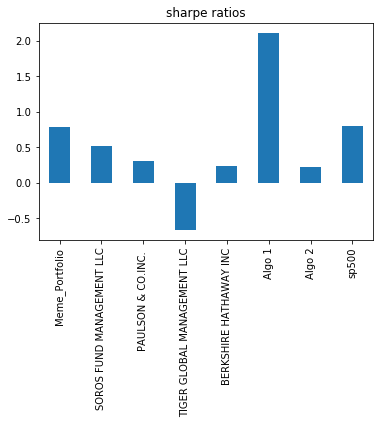

In [170]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### My Portfolio does about as well as SP500, but worse than Algo 1